In [36]:
import sys
import importlib
import gc
import glob
from itertools import combinations

import numpy as np
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

import pyemma
import mdtraj as md

In [2]:
sys.path.insert(1, "../python/")
sys.path.insert(1, "../../")
import util
import plotting

In [3]:
plt.style.use("custom")  # custom style sheet
plt.style.use("muted")  # muted color theme from SciencePlots

In [4]:
cm_seq = sns.cubehelix_palette(
    start=0, rot=-0.70, gamma=0.40, light=0.9, dark=0.1, as_cmap=True, reverse=True
)
colors = mpl.colors.to_rgba_array(
    [
        "#364B9A",
        "#4A7BB7",
        "#6EA6CD",
        "#98CAE1",
        "#C2E4EF",
        "#EAECCC",
        "#FEDA8B",
        "#FDB366",
        "#F67E4B",
        "#DD3D2D",
        "#A50026",
    ]
)
cm_div = mpl.colors.LinearSegmentedColormap.from_list("", colors)

# Load SMD data

In [5]:
# plot run09 and run10 CVs
cv_09 = np.loadtxt(
    "../biased/smd-prep/run09/cv-smd.txt", skiprows=1, usecols=range(1, 8)
)
cv_10 = np.loadtxt(
    "../biased/smd-prep/run10/cv-smd.txt", skiprows=1, usecols=range(1, 8)
)
cv_11 = np.loadtxt(
    "../biased/smd-prep/run11/cv-smd.txt", skiprows=1, usecols=range(1, 8)
)

In [6]:
labels = next(open("../biased/smd-prep/run09/cv-smd.txt")).split()[3:10]

In [7]:
print(labels)

['rmsd1', 'rmsd2', 'sb0', 'sb1', 'sb2', 'sb3', 'sb4']


In [8]:
cv_09.shape

(1001, 7)

findfont: Font family ['"Computer Modern Sans Serif"'] not found. Falling back to DejaVu Sans.


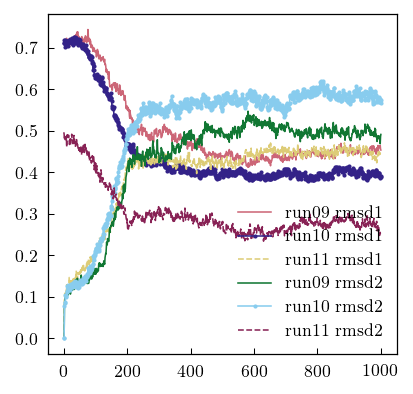

In [9]:
for i in range(2):
    plt.plot(cv_09[..., i], label=f"run09 rmsd{i + 1}")
    plt.plot(cv_10[..., i], ".-", label=f"run10 rmsd{i + 1}")
    plt.plot(cv_11[..., i], "--", label=f"run11 rmsd{i + 1}")
plt.legend()

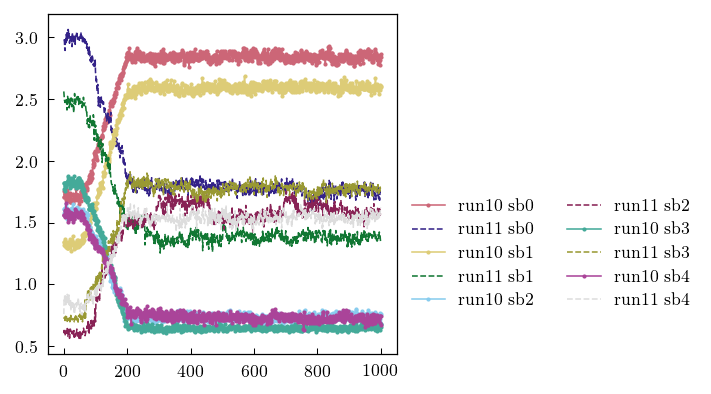

In [25]:
for i in range(2, 7):
    plt.plot(cv_10[..., i], ".-", label=f"run10 {labels[i]}")
    plt.plot(cv_11[..., i], "--", label=f"run11 {labels[i]}")
plt.legend(ncol=2, bbox_to_anchor=(1, 0.5))

In [26]:
cv_12 = np.loadtxt(
    "../biased/smd-prep/run12/cv-smd.txt", skiprows=1, usecols=range(1, 8)
)

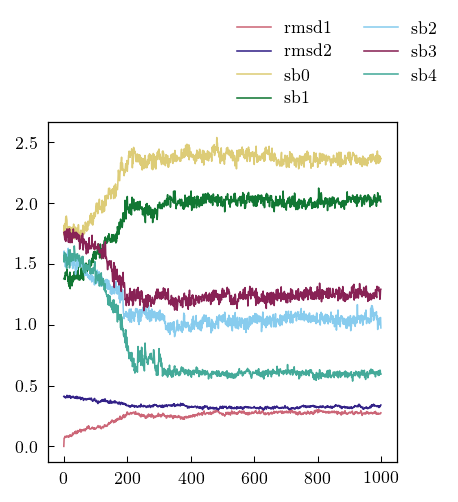

In [31]:
for cv, label in zip(cv_12.T, labels):
    plt.plot(cv, label=label)
plt.legend(ncol=2, bbox_to_anchor=(0.5, 1))

In [32]:
cv_14 = np.loadtxt("../biased/smd-prep/run14/cv-smd.txt", skiprows=1)
cv_15 = np.loadtxt("../biased/smd-prep/run15/cv-smd.txt", skiprows=1)
cv_16 = np.loadtxt("../biased/smd-prep/run16/cv-smd.txt", skiprows=1)

In [33]:
cv_14.shape

(1001, 12)

In [34]:
cv_15.shape

(1001, 12)

In [35]:
cv_16.shape

(1001, 12)

Text(0.5, 1.0, 'Up $\rightarrow$ Up+')

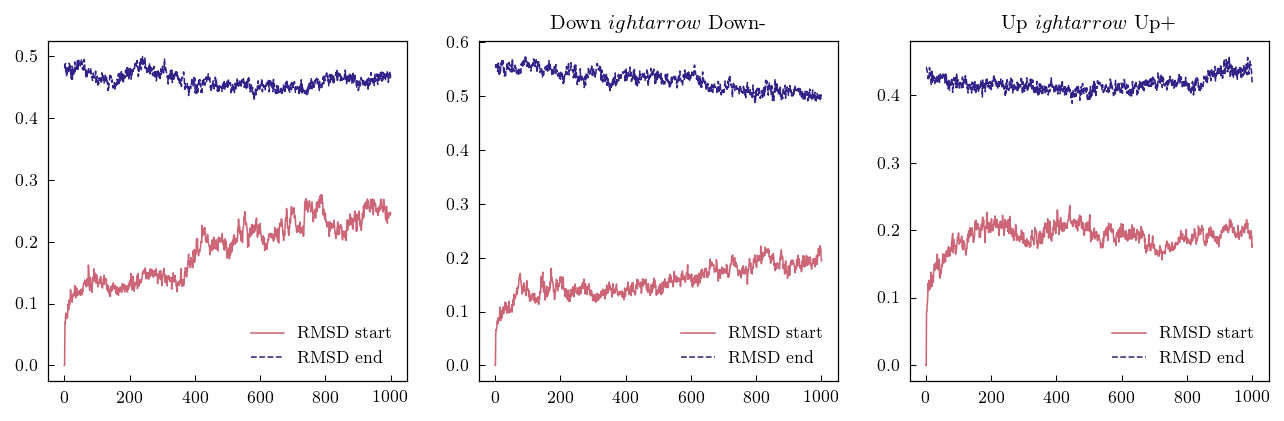

In [41]:
f, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(3 * 3.5, 3))
for ax, cv in zip(axs, (cv_14, cv_15, cv_16)):
    ax.plot(cv[..., 1], label="RMSD start")
    ax.plot(cv[..., 2], "--", label="RMSD end")
    ax.legend()
axs[1].set_title("Down $\rightarrow$ Down-")
axs[2].set_title("Up $\rightarrow$ Up+")

# Edit PDBs to change occupancy of only non-H atoms

In [42]:
import mdtraj as md

In [59]:
pdb = md.formats.pdb.pdbstructure.PdbStructure(
    open("../biased/smd-prep/down-seed2-nowat.pdb")
)

In [61]:
atom0 = next(pdb.iter_atoms())

In [75]:
atom0.residue_name

'GLN'

In [78]:
atom0.location.occupancy = 0.0

In [79]:
print(atom0.location.occupancy)

0.0


In [83]:
atom0.element.atomic_number

6

In [84]:
for atom in pdb.iter_atoms():
    if atom.element.atomic_number == 1:
        atom.location.occupancy = 0.0

In [24]:
# try biopython
import Bio.PDB
from Bio.PDB import PDBParser, StructureBuilder

In [93]:
parser = PDBParser()
pdb = parser.get_structure("civsd", "../biased/smd-prep/down-seed2-nowat.pdb")

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/Bio/PDB/PDBParser.py:421: PDBConstructionWarning: PDBConstructionException: Atom H defined twice in residue <Residue GLN het=  resseq=239 icode= > at line 2193.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstructionWarning,
/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2198
  PDBConstructionWarning,


In [117]:
for atom in pdb.get_atoms():
    print(atom, atom.bfactor, atom.occupancy, atom.element)

<Atom CAY> 1.0 1.0 C
<Atom HY1> 1.0 0.0 H
<Atom HY2> 1.0 0.0 H
<Atom HY3> 1.0 0.0 H
<Atom CY> 1.0 1.0 C
<Atom OY> 1.0 1.0 O
<Atom N> 1.0 1.0 N
<Atom H> 1.0 0.0 H
<Atom CA> 1.0 1.0 C
<Atom HA> 1.0 0.0 H
<Atom CB> 1.0 1.0 C
<Atom HB3> 1.0 0.0 H
<Atom HB2> 1.0 0.0 H
<Atom CG> 1.0 1.0 C
<Atom HG3> 1.0 0.0 H
<Atom HG2> 1.0 0.0 H
<Atom CD> 1.0 1.0 C
<Atom OE1> 1.0 1.0 O
<Atom NE2> 1.0 1.0 N
<Atom HE21> 1.0 0.0 H
<Atom HE22> 1.0 0.0 H
<Atom C> 1.0 1.0 C
<Atom O> 1.0 1.0 O
<Atom N> 1.0 1.0 N
<Atom H> 1.0 0.0 H
<Atom CA> 1.0 1.0 C
<Atom HA> 1.0 0.0 H
<Atom CB> 1.0 1.0 C
<Atom HB3> 1.0 0.0 H
<Atom HB2> 1.0 0.0 H
<Atom CG> 1.0 1.0 C
<Atom CD1> 1.0 1.0 C
<Atom HD1> 1.0 0.0 H
<Atom CE1> 1.0 1.0 C
<Atom HE1> 1.0 0.0 H
<Atom CZ> 1.0 1.0 C
<Atom HZ> 1.0 0.0 H
<Atom CD2> 1.0 1.0 C
<Atom HD2> 1.0 0.0 H
<Atom CE2> 1.0 1.0 C
<Atom HE2> 1.0 0.0 H
<Atom C> 1.0 1.0 C
<Atom O> 1.0 1.0 O
<Atom N> 1.0 1.0 N
<Atom H> 1.0 0.0 H
<Atom CA> 1.0 1.0 C
<Atom HA> 1.0 0.0 H
<Atom CB> 1.0 1.0 C
<Atom HB3> 1.0 0.0 H
<Atom

In [118]:
for atom in pdb.get_atoms():
    if atom.element == "H":
        atom.set_bfactor(0.0)
    else:
        atom.set_bfactor(1.0)

In [104]:
io = Bio.PDB.PDBIO()
io.set_structure(pdb)
with open("../biased/smd-prep/down-seed2-nowat-noh.pdb", mode="w+") as f:
    f.writelines(open("../biased/smd-prep/down-seed2-nowat.pdb").readlines()[:3])
    io.save(f)

In [34]:
def zero_h_occupancy(pdb_file, new_file_name=None, savelines=3):
    if new_file_name is None:
        new_file_name = pdb_file
    parser = PDBParser()
    pdb = parser.get_structure("", pdb_file)
    for atom in pdb.get_atoms():
        if atom.element == "H" or atom.element == "HE":
            atom.set_bfactor(0.0)
        else:
            atom.set_bfactor(1.0)
    io = Bio.PDB.PDBIO()
    io.set_structure(pdb)
    with open(new_file_name, mode="w+") as f:
        f.writelines(open(pdb_file).readlines()[:savelines])
        io.save(f)

In [35]:
zero_h_occupancy(f"../biased/smd-prep/run21/start-nowat.pdb", savelines=0)

In [120]:
header = "../biased/smd-prep/"
zero_h_occupancy(f"{header}down-seed2-nowat.pdb", f"{header}down-seed2-nowat-noh.pdb")
zero_h_occupancy(f"{header}up-seed2-nowat.pdb", f"{header}up-seed2-nowat-noh.pdb")
zero_h_occupancy(f"{header}downminus-seed-nowat-noh.pdb", savelines=1)
zero_h_occupancy(
    f"{header}upplus-seed-nowat.pdb", f"{header}upplus-seed-nowat-noh.pdb", savelines=1
)

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/Bio/PDB/PDBParser.py:421: PDBConstructionWarning: PDBConstructionException: Atom H defined twice in residue <Residue GLN het=  resseq=239 icode= > at line 2193.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstructionWarning,
/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2198
  PDBConstructionWarning,
/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/Bio/PDB/PDBParser.py:421: PDBConstructionWarning: PDBConstructionException: Atom H defined twice in residue <Residue GLN het=  resseq=133 icode= > at line 2193.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstructionWarning,
/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom

In [113]:
zero_h_occupancy(
    f"{header}up-seed2-nowat.pdb", new_file_name=f"{header}up-seed2-nowat-noh.pdb"
)

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/Bio/PDB/PDBParser.py:421: PDBConstructionWarning: PDBConstructionException: Atom H defined twice in residue <Residue GLN het=  resseq=133 icode= > at line 2193.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  PDBConstructionWarning,


In [116]:
zero_h_occupancy(
    f"{header}downminus-seed.pdb", f"{header}downminus-nowat-noh.pdb", savelines=1
)

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CAY) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'H' for Atom (name=HY1) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'H' for Atom (name=HY2) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'H' for Atom (name=HY3) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' fo

# NOH SMD runs

In [6]:
cv_17 = np.loadtxt("../biased/smd-prep/run17/cv-smd.txt", skiprows=1)
cv_18 = np.loadtxt("../biased/smd-prep/run18/cv-smd.txt", skiprows=1)
cv_19 = np.loadtxt("../biased/smd-prep/run19/cv-smd.txt", skiprows=1)

Text(0.5, 1.0, 'Up -> Up+')

findfont: Font family ['"Computer Modern Sans Serif"'] not found. Falling back to DejaVu Sans.


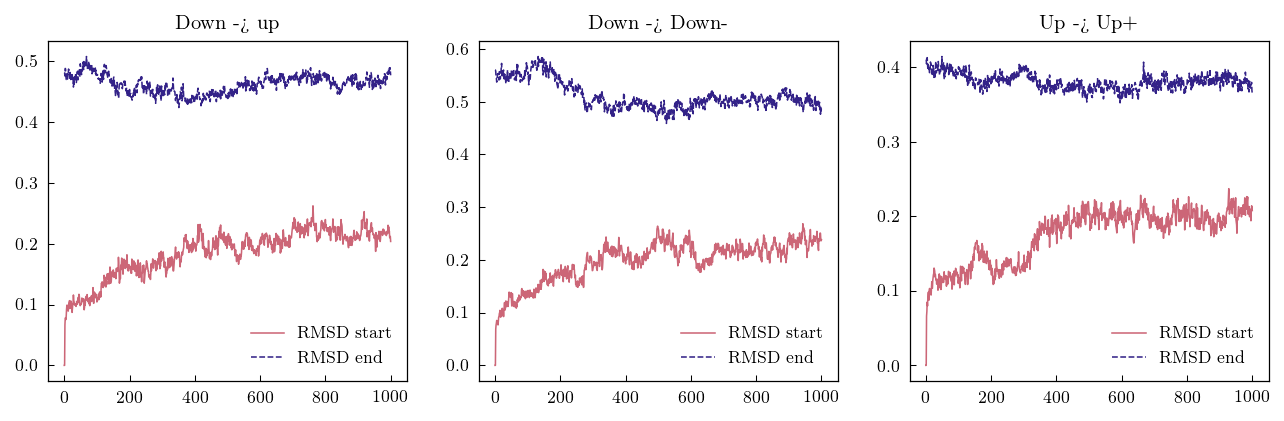

In [7]:
f, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(3 * 3.5, 3))
for ax, cv in zip(axs, (cv_17, cv_18, cv_19)):
    ax.plot(cv[..., 1], label="RMSD start")
    ax.plot(cv[..., 2], "--", label="RMSD end")
    ax.legend()
axs[0].set_title("Down -> up")
axs[1].set_title("Down -> Down-")
axs[2].set_title("Up -> Up+")

In [13]:
# load translocation/rotation CVs
ds = []
for i in range(17, 20):
    for j in range(2):
        f = f"../biased/smd-prep/run{i}/ds-{j}.txt"
        print(f)
        ds.append(np.loadtxt(f))

../biased/smd-prep/run17/ds-0.txt
../biased/smd-prep/run17/ds-1.txt
../biased/smd-prep/run18/ds-0.txt
../biased/smd-prep/run18/ds-1.txt
../biased/smd-prep/run19/ds-0.txt
../biased/smd-prep/run19/ds-1.txt


Text(0.5, 1.0, 'Up $\\Rightarrow$ Up+')

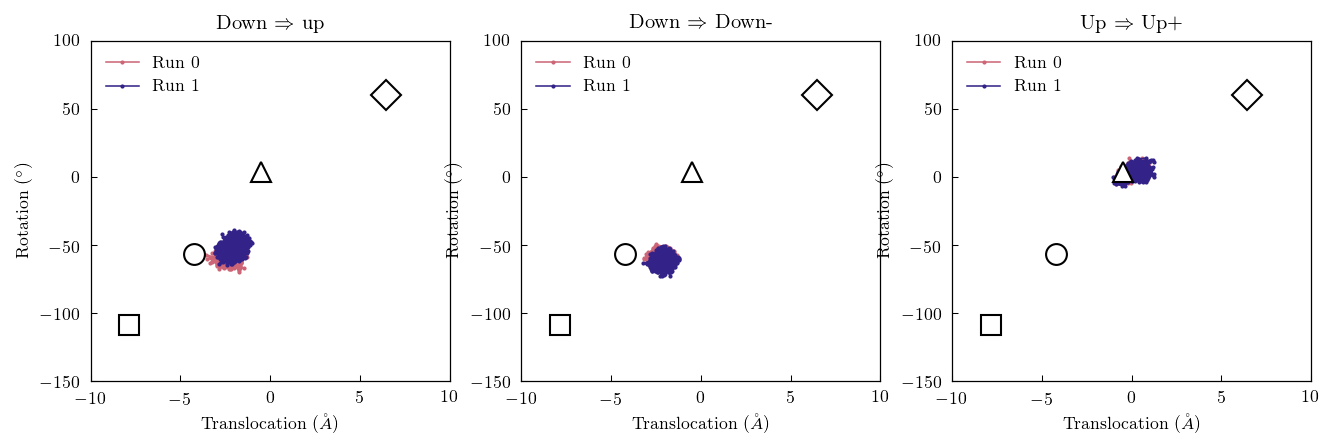

In [34]:
# plt.rc('text.latex',  preamble=r"\usepackage{amsmath}")
f, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(3 * 3.5, 3))
for i, ax in enumerate(axs):
    ax.plot(*ds[i * 2].T, ".-", label="Run 0")
    ax.plot(*ds[i * 2 + 1].T, ".-", label="Run 1")
    ax.legend()
    plotting.format_cvs(ax)
axs[0].set_title("Down $\Rightarrow$ up")
axs[1].set_title("Down $\Rightarrow$ Down-")
axs[2].set_title("Up $\Rightarrow$ Up+")

# Find seeds for new unbiased runs

In [10]:
feat = pyemma.coordinates.featurizer("../civsd-pro.pdb")
pair_indices = np.loadtxt("../data/feat3_atom_indices.txt", dtype=int)
feat.add_distances(pair_indices)
print(feat.describe())

['DIST: ARG 217 CA 1768 - ASP 129 CA 406', 'DIST: ARG 217 CA 1768 - ASP 136 CA 530', 'DIST: ARG 217 CA 1768 - ASP 151 CA 751', 'DIST: ARG 217 CA 1768 - ASP 164 CA 944', 'DIST: ARG 217 CA 1768 - GLU 183 CA 1258', 'DIST: ARG 217 CA 1768 - ASP 186 CA 1299', 'DIST: ARG 223 CA 1872 - ASP 129 CA 406', 'DIST: ARG 223 CA 1872 - ASP 136 CA 530', 'DIST: ARG 223 CA 1872 - ASP 151 CA 751', 'DIST: ARG 223 CA 1872 - ASP 164 CA 944', 'DIST: ARG 223 CA 1872 - GLU 183 CA 1258', 'DIST: ARG 223 CA 1872 - ASP 186 CA 1299', 'DIST: ARG 226 CA 1934 - ASP 129 CA 406', 'DIST: ARG 226 CA 1934 - ASP 136 CA 530', 'DIST: ARG 226 CA 1934 - ASP 151 CA 751', 'DIST: ARG 226 CA 1934 - ASP 164 CA 944', 'DIST: ARG 226 CA 1934 - GLU 183 CA 1258', 'DIST: ARG 226 CA 1934 - ASP 186 CA 1299', 'DIST: ARG 229 CA 1990 - ASP 129 CA 406', 'DIST: ARG 229 CA 1990 - ASP 136 CA 530', 'DIST: ARG 229 CA 1990 - ASP 151 CA 751', 'DIST: ARG 229 CA 1990 - ASP 164 CA 944', 'DIST: ARG 229 CA 1990 - GLU 183 CA 1258', 'DIST: ARG 229 CA 1990 - A

In [11]:
traj_files = []
for i in range(10, 14):
    infile = f"../biased/smd-prep/run{i}/run0.nc"
    outfile = f"../biased/smd-prep/run{i}/run0_prot.xtc"
    traj_files.append(outfile)

#     trj = md.load_netcdf(infile, top='../biased/smd-prep/civsd.prmtop')
#     trj.atom_slice(
#     trj.topology.select('protein')).save_xtc(
#         outfile, force_overwrite=True
#     )

In [12]:
outfile = "../biased/smd-prep/run20/run0_prot.xtc"
trj = md.load_netcdf(
    "../biased/smd-prep/run20/run0.nc", top="../biased/smd-prep/civsd.prmtop"
)
trj.atom_slice(trj.topology.select("protein")).save_xtc(outfile, force_overwrite=True)
traj_files.append(outfile)

In [37]:
outfile = "../biased/smd-prep/run21/run0_prot.xtc"
trj = md.load_netcdf(
    "../biased/smd-prep/run21/run0.nc", top="../biased/smd-prep/civsd.prmtop"
)
trj.atom_slice(trj.topology.select("protein")).save_xtc(outfile, force_overwrite=True)
traj_files.append(outfile)

In [38]:
sb_data = pyemma.coordinates.load(traj_files, features=feat, chunksize=32)

In [39]:
sb_data[0].shape

(1000, 60)

In [40]:
len(sb_data)

6

In [16]:
sb_ids = [42, 48, 47, 53]

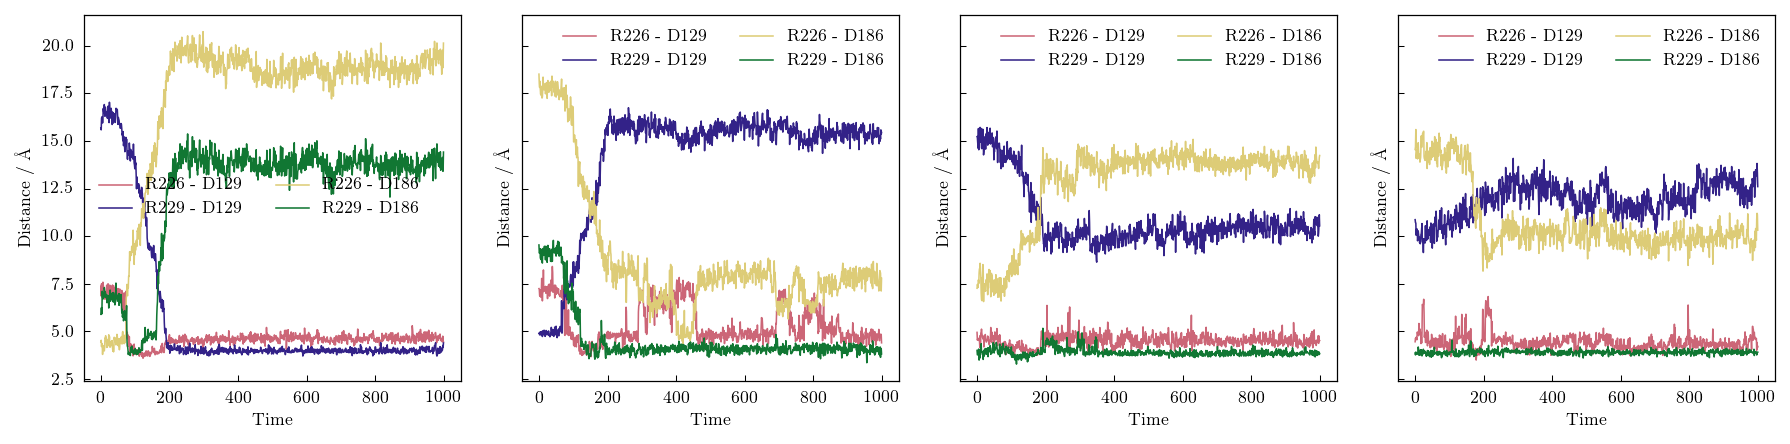

In [17]:
f, axs = plt.subplots(1, 4, figsize=(12, 3), sharex=True, sharey=True)
for ax, traj in zip(axs.flat, sb_data):
    for i in sb_ids:
        ax.plot(traj[..., i] * 10)
    ax.legend(["R226 - D129", "R229 - D129", "R226 - D186", "R229 - D186"], ncol=2)
    ax.set_xlabel("Time")
    ax.set_ylabel("Distance / Å")
f.tight_layout()

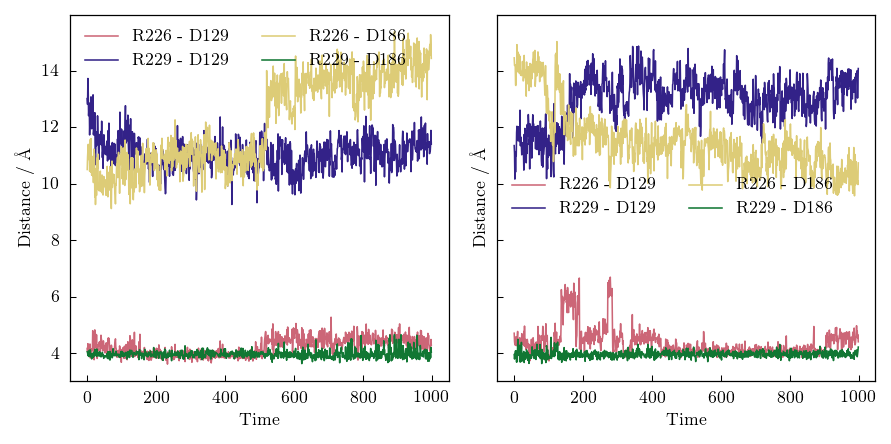

In [41]:
f, axs = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)
for ax, traj in zip(axs.flat[-2:], sb_data[-2:]):
    for i in sb_ids:
        ax.plot(traj[..., i] * 10)
    ax.legend(["R226 - D129", "R229 - D129", "R226 - D186", "R229 - D186"], ncol=2)
    ax.set_xlabel("Time")
    ax.set_ylabel("Distance / Å")
f.tight_layout()

In [42]:
sb_labels = []
for r in ("R217", "R223", "R226", "R229", "R232"):
    for n in ("D129", "D136", "D151", "D164", "E183", "D186"):
        sb_labels.append(f"{r} - {n}")

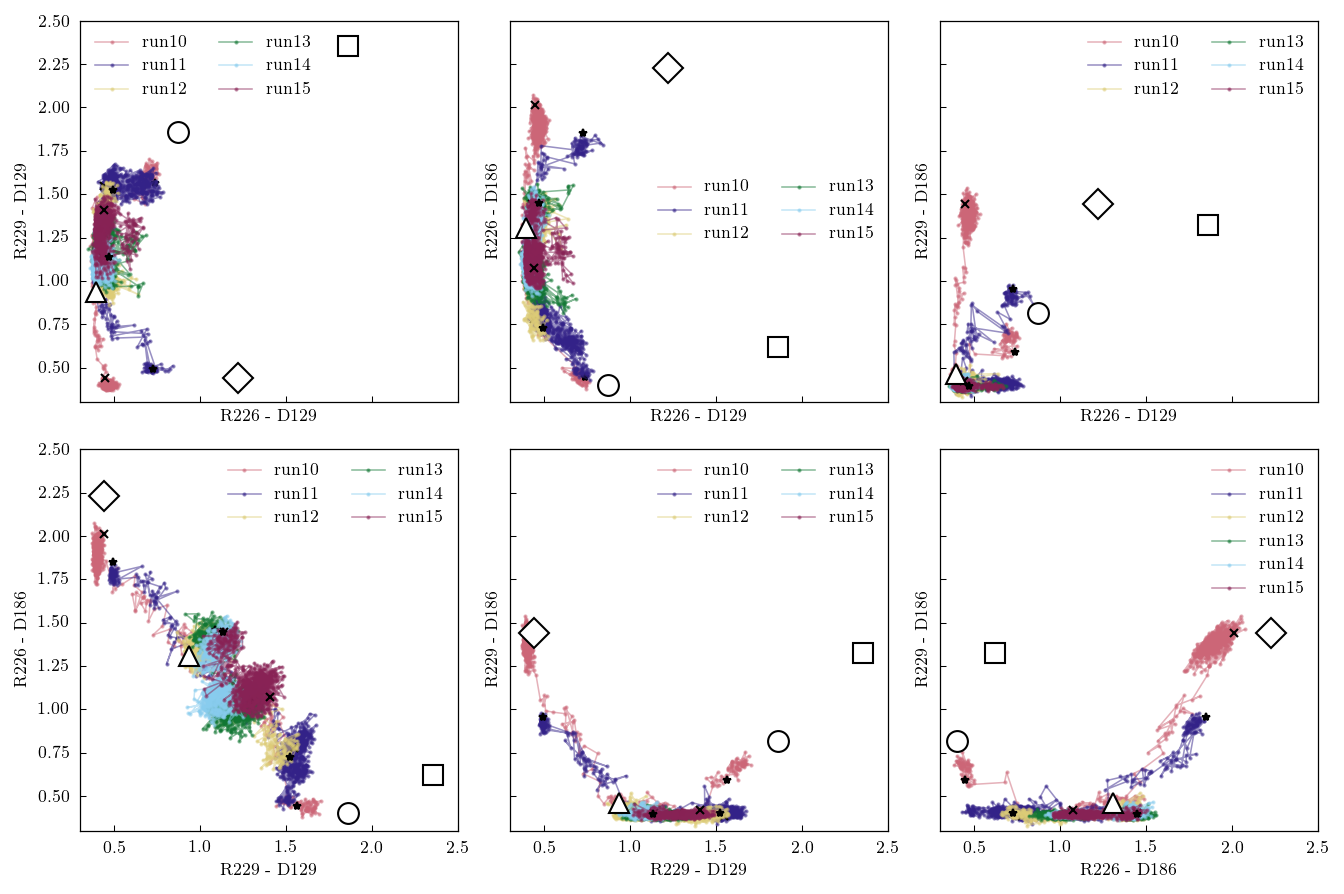

In [43]:
f, axes = plt.subplots(2, 3, figsize=(9, 6), sharex=True, sharey=True)

for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    for i, traj in enumerate(sb_data):
        ax.plot(traj[..., sb1], traj[..., sb2], ".-", alpha=0.5, label=f"run{i + 10}")
        ax.plot(traj[0, sb1], traj[0, sb2], "k*", ms=4)
        ax.plot(traj[-1, sb1], traj[-1, sb2], "kx", ms=4)
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.legend(ncol=2)

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
plotting.plot_sb_models(axes.flat, mode="du", centroids=True)
f.tight_layout()
plt.legend()

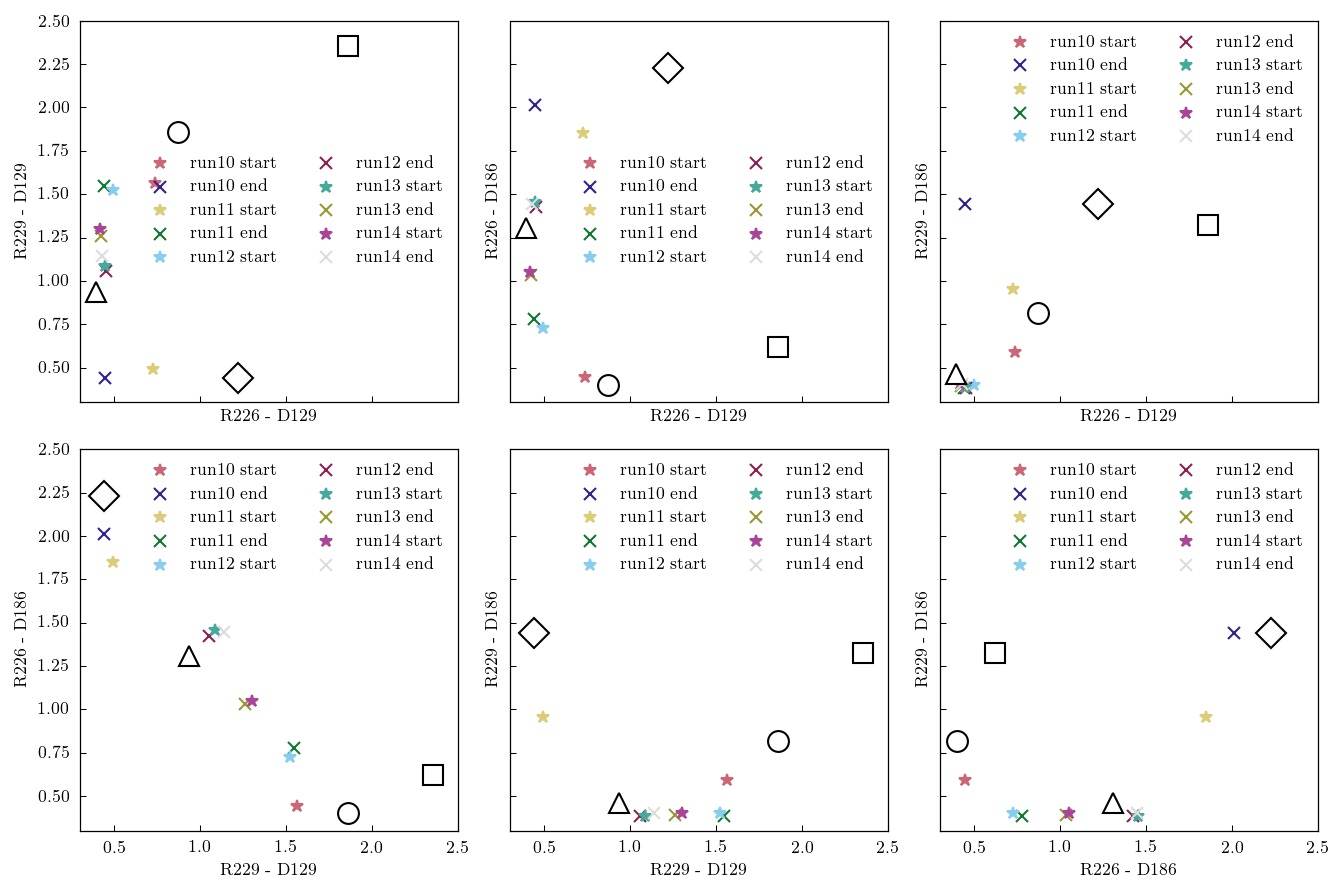

In [21]:
f, axes = plt.subplots(2, 3, figsize=(9, 6), sharex=True, sharey=True)

for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    for i, traj in enumerate(sb_data):
        ax.plot(traj[0, sb1], traj[0, sb2], "*", ms=6, label=f"run{i + 10} start")
        ax.plot(traj[-1, sb1], traj[-1, sb2], "x", ms=6, label=f"run{i + 10} end")
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.legend(ncol=2)

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
plotting.plot_sb_models(axes.flat, mode="du", centroids=True)
f.tight_layout()
plt.legend(ncol=2)